<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/Analisis_SAM_en_proceso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install Bio

BWA (Burrows-Wheeler Aligner): una herramienta rápida y precisa para la alineación de secuencias
¿Qué es BWA?

BWA (Burrows-Wheeler Aligner) es un algoritmo popular y eficiente que se utiliza para alinear lecturas de secuencias cortas (como las generadas por la secuenciación de próxima generación) con un genoma de referencia. Es conocida por su velocidad y precisión en la alineación de lecturas cortas, lo que la convierte en una herramienta ampliamente utilizada en los flujos de trabajo bioinformáticos.

¿Cómo funciona BWA?

BWA emplea un enfoque de dos pasos para la alineación de lectura:

Indexación: BWA primero construye un índice del genoma de referencia utilizando la transformada de Burrows-Wheeler (BWT) y sus derivados. Este índice sirve como una representación comprimida de la referencia, lo que permite búsquedas más rápidas de posibles ubicaciones de alineación.

Alineación: Una vez que se crea el índice, BWA busca las lecturas en la referencia utilizando los datos indexados. Emplea varias estrategias, como el retroceso y la siembra, para encontrar de manera eficiente las mejores alineaciones posibles.

Ventajas de BWA:

Velocidad: BWA es conocido por su alta velocidad, lo que lo hace adecuado para analizar grandes conjuntos de datos NGS donde los tiempos de alineación más rápidos son cruciales.
Precisión: BWA mantiene un buen equilibrio entre velocidad y precisión, produciendo alineaciones confiables para lecturas cortas.
Flexibilidad: BWA ofrece diferentes modos de alineación (por ejemplo, BWA-MEM para alineaciones separadas, BWA-ALN para alineaciones locales) para satisfacer diversas necesidades de análisis.
Tiempo empleado en la producción:

El tiempo exacto que tarda BWA en alinearse en la producción puede variar significativamente en función de varios factores:

Tamaño del genoma: Los genomas más grandes naturalmente requieren más tiempo para ser indexados y buscados.
Longitud y número de lectura: Las lecturas más largas y el mayor número de lecturas tardarán más en alinearse.
Recursos de hardware: La potencia informática disponible (núcleos de CPU, memoria) afecta a la velocidad de los pasos de indexación y alineación de BWA.
Modo de alineación: Los diferentes modos BWA (por ejemplo, BWA-MEM para alineaciones separadas) tienen diferentes tiempos de procesamiento.
Si bien las estimaciones de tiempo específicas son difíciles sin conocer el tamaño y el hardware de los datos, BWA generalmente se considera una herramienta de alineación rápida. En el caso de los conjuntos de datos típicos de lectura corta y el hardware moderno, los tiempos de alineación pueden ser del orden de minutos a horas.

Aquí hay una guía aproximada:

Genomas pequeños (p. ej., bacterias): minutos
Genomas medianos (p. ej., mamíferos): de decenas de minutos a horas (dependiendo del recuento de lecturas)
Genomas grandes (p. ej., genomas de plantas): horas o más
Notas adicionales:

BWA es una herramienta de código abierto, Disponible gratuitamente para su uso y modificación.
Varias herramientas y canalizaciones integran BWA para la alineación de lectura dentro de sus flujos de trabajo.
Al aprovechar la velocidad y la precisión de BWA, los investigadores en bioinformática pueden analizar de manera eficiente grandes volúmenes de datos de secuenciación y obtener información valiosa sobre la variación y la función genómicas.




tune

share


more_vert


In [25]:
!pip install bwa

In [26]:
!pip install pysam


# prompt: necesito transformar a fastq esta arcivo ar506.fna


#!seqtk seq -a arg506.fna > arg506.fastq

In [29]:
!sudo apt install bwa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 195 kB of archives.
After this operation, 466 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bwa amd64 0.7.17-6 [195 kB]
Fetched 195 kB in 1s (236 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package bwa.
(Reading database ... 121913 files and dir

Declaraciones de importación:

subprocess: Este módulo le permite ejecutar comandos externos (como ) desde su script de Python.bwa
from Bio import SeqIO: Importa la función de la biblioteca Biopython, que se utiliza para leer y escribir datos de secuencia en varios formatos.SeqIO
import pysam: Importa la biblioteca, que proporciona funcionalidad para trabajar con archivos SAM/BAM, un formato común para almacenar alineaciones de secuencia.pysam
Definiciones de variables:

reference_genome (str): Esta variable almacena la ruta al archivo del genoma de referencia, que normalmente está en formato FASTA (). Los archivos FASTA contienen secuencias de nucleótidos, una secuencia por línea, precedidas por una línea de encabezado que describe la secuencia..fna
fastq_file (str): Esta variable almacena la ruta al archivo FASTQ que contiene las lecturas cortas que se van a alinear con el genoma de referencia. Los archivos FASTQ tienen un formato específico con cuatro líneas por lectura:
Línea de encabezado (que comienza con @)
Línea de secuencia
Línea opcional que indica puntuaciones de calidad (+ o números)
Línea opcional con información adicional (a partir de @)
output_sam (str): Esta variable almacena el nombre de archivo deseado (incluida la ruta) para el archivo SAM de salida que contiene los resultados de la alineación. Los archivos SAM son archivos de texto con un formato específico que captura información sobre cada alineación de lectura, incluida su posición, puntuación y otros detalles.
Desglose del código:

Indexación del genoma de referencia (índice bwa):

subprocess.run(["bwa", "index", reference_genome])
Esta línea ejecuta el comando, que crea un índice para el genoma de referencia. Este índice acelera significativamente el proceso de alineación.bwa index
Alineación de lecturas mediante BWA-MEM:

subprocess.run(["bwa", "mem", reference_genome, fastq_file, "-o", output_sam])
Esta línea ejecuta el comando, que realiza la alineación de las lecturas con el genoma de referencia indexado ().bwa memfastq_filereference_genome
-o: Esta opción especifica el nombre de archivo de salida () para los resultados de alineación en formato SAM.output_sam
Lectura del archivo SAM (pysam):

samfile = pysam.AlignmentFile(output_sam, "r")
Esta línea abre el archivo SAM generado () en modo de lectura () utilizando la biblioteca.output_sam"r"pysam
for read in samfile:
Este bucle recorre en iteración cada entrada de lectura en el archivo SAM.
print(read)
Esta línea imprime los detalles de cada objeto leído, que incluye diversa información de alineación.
Nota: La instrucción no se incluye explícitamente aquí, pero debe agregarse al final del bucle o en un punto adecuado para cerrar correctamente el archivo y liberar recursos.samfile.close()
Resumen:

Este código Python alinea de manera eficiente las lecturas cortas de un archivo FASTQ con un genoma de referencia utilizando el algoritmo BWA-MEM. A continuación, lee el archivo SAM generado para su posterior análisis.

In [48]:
import subprocess
from Bio import SeqIO
import bwa

In [14]:
!seqtk seq -a arg506.fna > arg506.fastq

/bin/bash: line 1: seqtk: command not found


In [65]:

import subprocess
from Bio import SeqIO
import pysam

# Definir los archivos
reference_genome = "/content/adn_covid.fasta"
fastq_file =  "/rna_arg.fasta"
output_sam = "aligned_reads.sam"



In [66]:
# prompt: quiero saber la cantidada de caracteres de los archvivos

!wc -c /content/adn_covid.fasta
!wc -c /rna_arg.fasta


9449 /content/adn_covid.fasta
9449 /rna_arg.fasta


In [50]:
subprocess.run(["bwa", "index", reference_genome])

# Alinear las secuencias usando BWA-MEM
subprocess.run(["bwa", "mem", reference_genome, fastq_file, "-o", output_sam])

# Leer el archivo SAM alineado con pysam
samfile = pysam.AlignmentFile(output_sam, "r")
for read in samfile:
  print(read)

NM_000130.5	0	#0	1	60	9132M	*	0	0	ATTGCAGCTGGGACAGCCCGGAGTGTGGTTAGCAGCTCGGCAAGCGCTGCCCAGGTCCTGGGGTGGTGGCAGCCAGCGGGAGCAGGAAAGGAAGCATGTTCCCAGGCTGCCCACGCCTCTGGGTCCTGGTGGTCTTGGGCACCAGCTGGGTAGGCTGGGGGAGCCAAGGGACAGAAGCGGCACAGCTAAGGCAGTTCTACGTGGCTGCTCAGGGCATCAGTTGGAGCTACCGACCTGAGCCCACAAACTCAAGTTTGAATCTTTCTGTAACTTCCTTTAAGAAAATTGTCTACAGAGAGTATGAACCATATTTTAAGAAAGAAAAACCACAATCTACCATTTCAGGACTTCTTGGGCCTACTTTATATGCTGAAGTCGGAGACATCATAAAAGTTCACTTTAAAAATAAGGCAGATAAGCCCTTGAGCATCCATCCTCAAGGAATTAGGTACAGTAAATTATCAGAAGGTGCTTCTTACCTTGACCACACATTCCCTGCGGAGAAGATGGACGACGCTGTGGCTCCAGGCCGAGAATACACCTATGAATGGAGTATCAGTGAGGACAGTGGACCCACCCATGATGACCCTCCATGCCTCACACACATCTATTACTCCCATGAAAATCTGATCGAGGATTTCAACTCGGGGCTGATTGGGCCCCTGCTTATCTGTAAAAAAGGGACCCTAACTGAGGGTGGGACACAGAAGACGTTTGACAAGCAAATCGTGCTACTATTTGCTGTGTTTGATGAAAGCAAGAGCTGGAGCCAGTCATCATCCCTAATGTACACAGTCAATGGATATGTGAATGGGACAATGCCAGATATAACAGTTTGTGCCCATGACCACATCAGCTGGCATCTGCTGGGAATGAGCTCGGGGCCAGAATTATTCTCCATTCATTTCAACGGCCAGGTCCTGGAGCAGAACCATCATAAGGTCTCAGCCATCACCCTTGTCAGTG

# Desglose de la información:

# Campos de registro SAM:

NM_000130.5: Este es el nombre de lectura, que es un identificador único para la lectura.
0: Este es el nombre de referencia, que indica el cromosoma o contig con el que se alineó la lectura. En este caso, se alinea con la secuencia de referencia "0".
#0: Este es el valor de la bandera, que proporciona información sobre la alineación y la calidad de lectura. No es visible en la información proporcionada.
1: Esta es la calidad de mapeo, que representa la confianza en la alineación. Un valor más alto indica una mayor confianza.
60: Esta es la posición inicial de la alineación en la secuencia de referencia. La lectura se alinea a partir de la base 60 de la referencia.
9132M: Esta es la cadena CIGAR, que describe la alineación en términos de operaciones como coincidencias (M), inserciones (I) y eliminaciones (D). En este caso, "9132M" indica que hay 9132 coincidencias consecutivas entre la lectura y la referencia.
*: Este es el cigarro mate, que es relevante para las lecturas de extremos emparejados y no es aplicable en este caso.
0: Este es el nombre de referencia de la relación de posición, que tampoco se aplica a las lecturas de extremo emparejado.
0: Esta es la posición de relación de posición, no aplicable a las lecturas de extremo emparejado.
** Línea de nucleótidos...:** Representa la secuencia de nucleótidos real de la lectura. Desafortunadamente, esta parte no se proporciona en la información proporcionada.
Análisis de cadenas CIGAR:

9132M: Esta cadena CIGAR indica que hay 9132 coincidencias consecutivas entre la secuencia de lectura y la secuencia de referencia. Esto significa que la lectura es muy similar a la secuencia de referencia en estas posiciones.
Etiquetas adicionales:

AS:9132: Esta etiqueta indica la puntuación de alineación, que es una medida numérica de la bondad de la alineación. En este caso, la puntuación es 9132, que es alta y apoya el alto grado de similitud observado en la cadena CIGAR.
XS:0: Esta etiqueta indica el número de bases que se recortaron suavemente. El recorte suave se refiere al recorte de bases de los extremos de la lectura que no se alinean bien con la referencia. En este caso, no hay bases recortadas suavemente, lo que sugiere que toda la lectura está bien alineada.
En general, la información proporcionada indica que la lectura "NM_000130.5" es muy similar a la secuencia de referencia "0". La cadena CIGAR muestra 9132 coincidencias consecutivas, y la puntuación de alineación y la falta de clips blandos respaldan aún más este alto grado de similitud.

In [54]:
import pysam
import matplotlib.pyplot as plt


In [55]:
samfile = pysam.AlignmentFile("aligned_reads.sam", "r")


In [57]:
def visualize_alignment(read_name, reference_name, alignment_position, cigar_string):
  # Create Figure and Axes
  fig, ax = plt.subplots()

  # Plot Reference Sequence
  reference_length = len(read.get_reference_sequence())
  x_values = range(reference_length)
  y_values = [0] * reference_length
  ax.plot(x_values, y_values, label="Reference Sequence", color="blue")

  # Parse CIGAR String
  cigar_operations = []
  for op, length in cigar_string:
    cigar_operations.append((op, int(length)))

  # Plot Read Alignment
  read_start = alignment_position
  for op, length in cigar_operations:
    if op == "M":  # Match
      x_values = range(read_start, read_start + length)
      y_values = [1] * length
      ax.plot(x_values, y_values, label="Read Alignment", color="green")
      read_start += length
    elif op == "I":  # Insertion
      read_start += length
    elif op == "D":  # Deletion
      x_values = range(read_start, read_start + length)
      y_values = [-1] * length
      ax.plot(x_values, y_values, label="Read Alignment", color="red")
      read_start += length

  # Set Labels and Title
  ax.set_xlabel("Position in Reference Sequence")
  ax.set_ylabel("Alignment Status")
  ax.set_title(f"Alignment of Read {read_name} to Reference {reference_name}")

  # Add Legend
  ax.legend()

  # Show Plot
  plt.show()


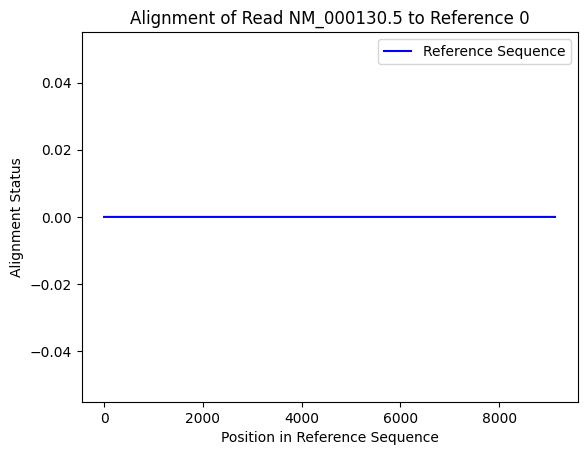

In [58]:
# Visualize Alignment
visualize_alignment(read_name, reference_name, alignment_position, cigar_string);

In [61]:
for read in samfile:
  # Extract Alignment Information
  read_name = read.qname
  reference_name = read.rname
  alignment_position = read.pos
  cigar_string = read.cigar

In [64]:
print(read.pos)

0


In [63]:
print(read.rname)

0


In [62]:
print(f"Read name: {read.qname}")

Read name: NM_000130.5


In [53]:
for read in samfile:
  print(f"Read name: {read.qname}")
  print(f"Reference sequence: {read.rname}")
  print(f"Alignment position: {read.pos}")
  print(f"CIGAR string: {read.cigar}")
  20)  # Optional separator betwprint("-" * een reads

In [67]:
print(samfile.header)

@SQ	SN:NM_000130.5	LN:9132
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem /content/adn_covid.fasta /rna_arg.fasta -o aligned_reads.sam



In [69]:
import pysam

samfile = pysam.AlignmentFile(output_sam, "r")
for read in samfile:
    print(read.mapping_quality) # Changed 'alignment_quality' to 'mapping_quality'

60


In [71]:
print(read.mapping_quality)  # Changed 'alignment_quality' to 'mapping_quality'


60


 Esta línea recupera la calidad de asignación de la lectura actual
  y  la imprime. La calidad de la representación cartográfica es una puntuación numérica asignada durante el proceso de alineación. Refleja la confianza o probabilidad de que la lectura se alinee realmente con la posición indicada en el archivo SAM. Las puntuaciones más altas indican una mayor confianza en la alineación.read.mapping_quality

# Explicación de la salida: 60

En su caso, el código imprimió el valor . Esto indica que la calidad de asignación para la lectura actual que se está procesando es 60. Si bien la interpretación específica de las puntuaciones de calidad de mapeo puede variar según el software de alineación utilizado, en general, una puntuación de 60 se considera una alineación de buena calidad. Sugiere que existe un alto grado de confianza en que la lectura se alinea con precisión con la secuencia de referencia en la posición especificada en el archivo SAM.60

# Notas adicionales:

El fragmento de código original tenía un error tipográfico, usando en lugar del atributo correcto . Esto se ha corregido en la explicación.alignment_qualitymapping_quality
El código solo imprime la calidad de la asignación. Puede modificar el bucle para acceder e imprimir otra información disponible en el objeto, como el nombre de lectura, la secuencia de referencia con la que se alineó, la cadena CIGAR (que indica las operaciones de alineación) y mucho más. Consulte la documentación para obtener una lista completa de los atributos a los que se puede acceder a través del objeto.readpysamread

In [70]:
!head aligned_reads.sam

@SQ	SN:NM_000130.5	LN:9132
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem /content/adn_covid.fasta /rna_arg.fasta -o aligned_reads.sam
NM_000130.5	0	NM_000130.5	1	60	9132M	*	0	0	ATTGCAGCTGGGACAGCCCGGAGTGTGGTTAGCAGCTCGGCAAGCGCTGCCCAGGTCCTGGGGTGGTGGCAGCCAGCGGGAGCAGGAAAGGAAGCATGTTCCCAGGCTGCCCACGCCTCTGGGTCCTGGTGGTCTTGGGCACCAGCTGGGTAGGCTGGGGGAGCCAAGGGACAGAAGCGGCACAGCTAAGGCAGTTCTACGTGGCTGCTCAGGGCATCAGTTGGAGCTACCGACCTGAGCCCACAAACTCAAGTTTGAATCTTTCTGTAACTTCCTTTAAGAAAATTGTCTACAGAGAGTATGAACCATATTTTAAGAAAGAAAAACCACAATCTACCATTTCAGGACTTCTTGGGCCTACTTTATATGCTGAAGTCGGAGACATCATAAAAGTTCACTTTAAAAATAAGGCAGATAAGCCCTTGAGCATCCATCCTCAAGGAATTAGGTACAGTAAATTATCAGAAGGTGCTTCTTACCTTGACCACACATTCCCTGCGGAGAAGATGGACGACGCTGTGGCTCCAGGCCGAGAATACACCTATGAATGGAGTATCAGTGAGGACAGTGGACCCACCCATGATGACCCTCCATGCCTCACACACATCTATTACTCCCATGAAAATCTGATCGAGGATTTCAACTCGGGGCTGATTGGGCCCCTGCTTATCTGTAAAAAAGGGACCCTAACTGAGGGTGGGACACAGAAGACGTTTGACAAGCAAATCGTGCTACTATTTGCTGTGTTTGATGAAAGCAAGAGCTGGAGCCAGTCATCATCCCTAATGTACACAGTCAATGGATATGTGAATGGGACAATGCCA

In [76]:
samfile.close()

In [77]:
import pysam

samfile = pysam.AlignmentFile(output_sam, "r")
for read in samfile:
    print(read.mapping_quality) # Use mapping_quality instead of alignment_quality
samfile.close()

60
